<a href="https://colab.research.google.com/github/RoginRobert2014/CE888/blob/main/lab4/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)


In [65]:
data = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv", header=None)
jokes_data = data.copy()
len(jokes_data)

24983

In [55]:
# Replace the value 99 with NaNs . This is the test set.
jokes_test_data = jokes_data.replace(99.00,np.nan)
jokes_test_data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74.0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,100.0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49.0,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,48.0,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,91.0,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,100.0,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,91.0,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,NaN,NaN,NaN,NaN,NaN,4.90,NaN,NaN,NaN,NaN,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,39.0,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,NaN,NaN,-6.46,-1.65,-6.80,-6.41,-6.99,7.23,6.75,-6.99,6.55,NaN,NaN,NaN,NaN,0.49,-0.53,-6.94,-0.49,NaN,6.46,-0.53,NaN,NaN,-7.86,-0.34,NaN,-6.94,NaN,...,0.49,-0.24,NaN,NaN,-3.11,-6.65,NaN,-0.58,6.31,NaN,NaN,-7.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24981,37.0,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,NaN,NaN,NaN,-9.47,NaN,3.45,-0.92,-4.51,-4.13,-5.73,-9.51,2.82,NaN,NaN,NaN,NaN,-0.49,2.91,2.62,8.30,NaN,3.06,5.44,NaN,NaN,-0.68,2.04,NaN,

In [56]:
# Remove the column because it doesn't contain ratings
jokes_test_data = jokes_test_data.drop(jokes_test_data.columns[0], axis=1)
jokes_test_data_org = jokes_test_data.copy()

In [67]:
# Use pandas to find the best- and the worst-rated jokes
mean_array = []
for i in jokes_test_data.columns:
  mean_array.append(np.mean(jokes_test_data[i]))
print(mean_array)
print(len(mean_array))
best_joke = max(mean_array)
print("Best joke is in column is " , np.argmax(mean_array)  , "with a value ", best_joke)
worst_joke = min(mean_array)
print("Worst joke is in column is in ", np.argmin(mean_array)  , "with a value ", worst_joke)


[0.9045733041575473, 0.20845963484381844, 0.31657433000841273, -1.4491139159405428, 0.4035564719541942, 1.5944471636238982, -0.42966247597693813, -0.6240851046795616, -0.5570308532249889, 1.3012305648494402, 1.8057967095916765, 1.4492900147170251, -1.762881790160528, 1.3963344437042027, -1.7062013052007865, -3.104818018018001, -1.1151413130504473, -0.6351034869290236, 0.15422691968932692, -0.933996797437956, 2.095625777456765, 0.8686618765455205, 0.1091923326511263, -1.6874198627117565, 0.38237269408147534, 1.286232000000005, 3.1898213138451355, 1.5188299291371237, 2.972455281944338, -0.43649274072426036, 2.198943462037635, 3.155987654320997, -1.3686476293103353, 0.8594940407178956, 3.00635059313884, 3.3125003004205738, -1.3639867306439248, 1.3004786070522285, 1.0673370883882167, 0.998634699526747, -0.3204998135024238, 1.966875330701282, -0.9248558049226209, -2.1118909562959822, 1.1086161781946084, 1.5002315343915265, 1.5595346432264716, 1.825884443008845, 2.7712978322714887, 3.6650848

In [47]:
# # Validation dataset created using the helper function
# val_data = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv", header=None)
# print(val_data)

In [48]:
# array = val_data.values
# array

In [49]:
# ratedValue = np.where(array!=99)
# ratedValue
# # print(len(ratedValue[0]), ratedValue[1].shape)

In [59]:
array = jokes_test_data.values

In [52]:
# validation set

def replaceFn(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(array!=np.nan) 
  n_rated = len(rated[1])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

new_arr, idx = replaceFn(array, 0.1)
print(new_arr)
print(idx)

[[99.    8.79 99.   ... 99.     nan   nan]
 [ 4.08 -0.29  6.36 ...  0.34 -4.32  1.07]
 [99.     nan 99.   ...   nan   nan   nan]
 ...
 [  nan   nan   nan ...   nan   nan   nan]
 [  nan 99.     nan ...   nan   nan   nan]
 [ 2.43  2.67 -3.98 ...   nan   nan   nan]]
(array([ 3423,   572, 24730, ...,  4309, 16150, 21560]), array([10, 88, 68, ..., 60, 61, 15]))


In [29]:
print("new_arr", new_arr)
print("idx", idx)
# len(new_arr)
# new_arr, idx

new_arr [[ 74.    -7.82   8.79 ...  99.    99.    99.  ]
 [100.     4.08  -0.29 ...   0.34  -4.32   1.07]
 [ 49.    99.    99.   ...  99.    99.    99.  ]
 ...
 [ 39.    99.    99.   ...  99.    99.    99.  ]
 [ 37.    99.    99.   ...  99.    99.    99.  ]
 [ 72.    99.    99.   ...  99.    99.    99.  ]]
idx (array([ 1969,  7554, 15828, ..., 19260, 18465, 19614]), array([31, 47, 18, ..., 50, 47, 21]))


In [60]:
n_latent_factors = 2

user_ratings = jokes_test_data.values
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))


In [61]:
latent_user_preferences

array([[0.256, 0.063],
       [0.989, 0.256],
       [0.413, 0.448],
       ...,
       [0.203, 0.362],
       [0.59 , 0.404],
       [0.128, 0.879]])

In [62]:
latent_item_features

array([[1.779e-01, 5.455e-01],
       [1.584e-02, 1.066e-01],
       [8.515e-01, 4.880e-01],
       [5.212e-01, 5.241e-01],
       [8.639e-01, 3.068e-02],
       [8.076e-01, 1.709e-01],
       [1.002e-02, 8.403e-01],
       [9.241e-01, 9.285e-02],
       [6.023e-01, 6.102e-01],
       [7.393e-01, 9.464e-01],
       [1.014e-01, 4.285e-01],
       [9.901e-02, 6.308e-01],
       [7.254e-01, 2.635e-01],
       [5.559e-01, 4.075e-01],
       [6.866e-01, 4.008e-01],
       [5.188e-01, 8.816e-01],
       [2.923e-01, 6.404e-01],
       [5.572e-01, 2.803e-01],
       [3.820e-01, 4.831e-02],
       [8.986e-01, 4.768e-04],
       [7.894e-01, 9.482e-01],
       [5.103e-03, 6.252e-01],
       [2.840e-01, 8.750e-01],
       [4.187e-01, 6.066e-01],
       [9.719e-01, 4.709e-01],
       [4.630e-01, 2.200e-01],
       [5.553e-01, 6.574e-01],
       [2.890e-01, 3.575e-01],
       [2.879e-01, 4.718e-01],
       [9.997e-01, 8.243e-02],
       [3.625e-01, 6.867e-01],
       [7.308e-01, 9.120e-01],
       [

In [63]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10000) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

Iteration 0/10:	MSE=26.147890


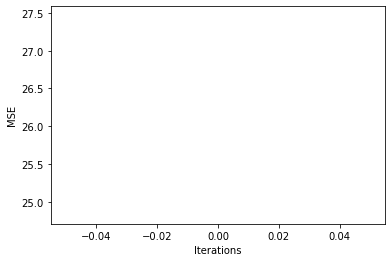

In [64]:
num_iter = 10
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 10000), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [68]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[0.541, 0.339, 0.352, ..., 0.687, 0.312, 0.921],
       [1.   , 0.608, 0.653, ..., 1.354, 0.635, 1.811],
       [1.782, 1.153, 1.15 , ..., 2.075, 0.897, 2.794],
       ...,
       [0.536, 0.354, 0.344, ..., 0.588, 0.245, 0.794],
       [1.034, 0.658, 0.669, ..., 1.257, 0.557, 1.689],
       [1.732, 1.157, 1.11 , ..., 1.837, 0.746, 2.484]])

In [71]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
data = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv", columns)
comparison_data.columns = data.columns

ValueError: ignored